# Perceptron 

A perceptron is a type of artificial neural network that models the behavior of a single neuron. It is a simple algorithm that can be used for supervised learning of binary classifiers, meaning it can learn to classify input data into one of two possible classes.

The perceptron receives one or more input signals and produces an output signal. Each input signal is associated with a weight, which determines the strength of the connection between the input and the output. The perceptron also has a bias, which is an additional input with a fixed weight that helps to adjust the output.

During training, the perceptron adjusts the weights and bias based on the error between its output and the correct output for a given input. This process is known as the perceptron learning rule, and it involves updating the weights and bias in proportion to the input and the error.

The perceptron is a fundamental building block of artificial neural networks and has been used in many applications, including image recognition, speech recognition, and natural language processing. However, it has limitations, such as its ability to only classify linearly separable data, which led to the development of more complex neural network architectures.  

![Alt text](perceptron-6168423.jpeg) 

We would use penguin data to illustrate the method.
The dataset contain 8 variables: 
1. species: penguin species (Chinstrap, Adélie, or Gentoo)
2. culmen_length_mm: culmen length (mm)
3. culmen_depth_mm: culmen depth (mm)
4. flipper_length_mm: flipper length (mm)
5. body_mass_g: body mass (g)
6. island: island name (Dream, Torgersen, or Biscoe) in thePalmer. 
7. Archipelago (Antarctica) sex: penguin sex
8. The culmen is “the upper ridge of a bird’s beak”.

In [21]:

import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import Perceptron
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions


In [22]:
penguin = pd.read_csv('/Users/weitaoran/Desktop/rice/inde577/INDE577/supervised-learning/Perceptron/penguins_size.csv')

penguin['sex'] = penguin['sex'].map({'MALE':1,'FEMALE':0})

penguin.head(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0.0


In [23]:
penguin_new = penguin.loc[penguin["sex"] != "."]
penguin_clean=penguin_new.dropna(how='any',axis=0)


In [24]:
penguin_clean = penguin_clean[penguin["species"] != "Chinstrap"]
penguin_clean

/var/folders/dh/1vvt16vd4g58dtmk_kvkzh7c0000gn/T/ipykernel_91772/4260543033.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  penguin_clean = penguin_clean[penguin["species"] != "Chinstrap"]


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0.0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,1.0
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,0.0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,0.0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,1.0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,0.0


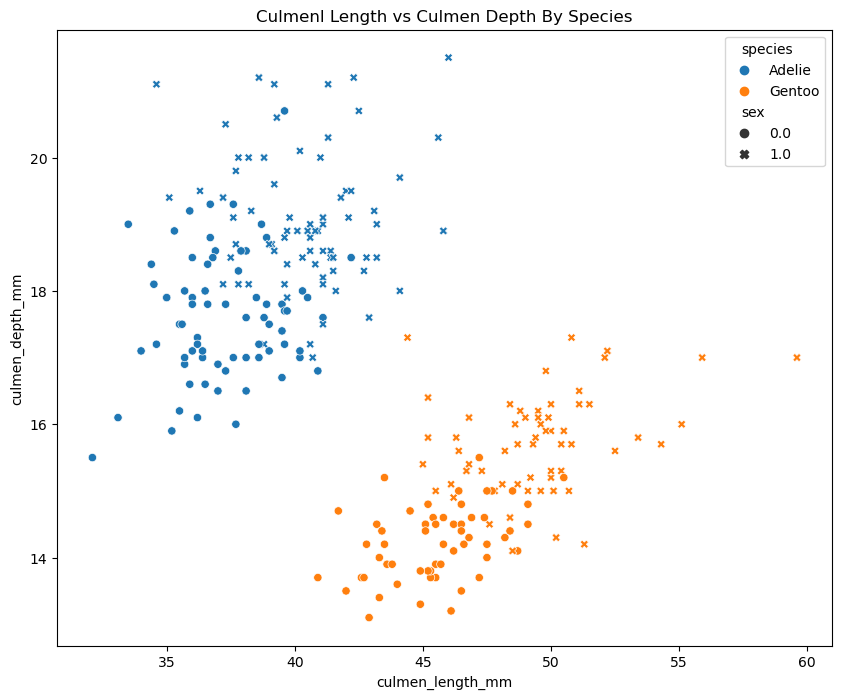

In [25]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = "culmen_length_mm", y = "culmen_depth_mm", data = penguin_clean, hue = "species",style="sex")
plt.title("Culmenl Length vs Culmen Depth By Species")
plt.show() 

In [26]:
X = penguin_clean[["culmen_length_mm", "culmen_depth_mm"]].to_numpy()

y = penguin_clean["sex"].to_numpy()
X_bar = []
for x in X:
    X_bar.append(np.append(x,np.ones(1)))
X_bar=np.array(X_bar)
X_bar

array([[39.1, 18.7,  1. ],
       [39.5, 17.4,  1. ],
       [40.3, 18. ,  1. ],
       [36.7, 19.3,  1. ],
       [39.3, 20.6,  1. ],
       [38.9, 17.8,  1. ],
       [39.2, 19.6,  1. ],
       [41.1, 17.6,  1. ],
       [38.6, 21.2,  1. ],
       [34.6, 21.1,  1. ],
       [36.6, 17.8,  1. ],
       [38.7, 19. ,  1. ],
       [42.5, 20.7,  1. ],
       [34.4, 18.4,  1. ],
       [46. , 21.5,  1. ],
       [37.8, 18.3,  1. ],
       [37.7, 18.7,  1. ],
       [35.9, 19.2,  1. ],
       [38.2, 18.1,  1. ],
       [38.8, 17.2,  1. ],
       [35.3, 18.9,  1. ],
       [40.6, 18.6,  1. ],
       [40.5, 17.9,  1. ],
       [37.9, 18.6,  1. ],
       [40.5, 18.9,  1. ],
       [39.5, 16.7,  1. ],
       [37.2, 18.1,  1. ],
       [39.5, 17.8,  1. ],
       [40.9, 18.9,  1. ],
       [36.4, 17. ,  1. ],
       [39.2, 21.1,  1. ],
       [38.8, 20. ,  1. ],
       [42.2, 18.5,  1. ],
       [37.6, 19.3,  1. ],
       [39.8, 19.1,  1. ],
       [36.5, 18. ,  1. ],
       [40.8, 18.4,  1. ],
 

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size= 0.3, random_state =42)

Define perceptron

In [28]:
class Perceptron(object):
    def __init__(self, eta = .5, epochs=50):
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
        

Next we instantiate an instance of the Perceptron class and train this instance over 10000 epochs by running the following code in the cell below

In [36]:
# Instantiate one instance of the Perceptron class
clf = Perceptron(epochs = 100000)
# Call the train method to train the weights and bias of the given instance
clf.train(X, y)

# Predict labels on the features in X
y_hat = clf.predict(X)



In [37]:
y=y.astype(np.int_)

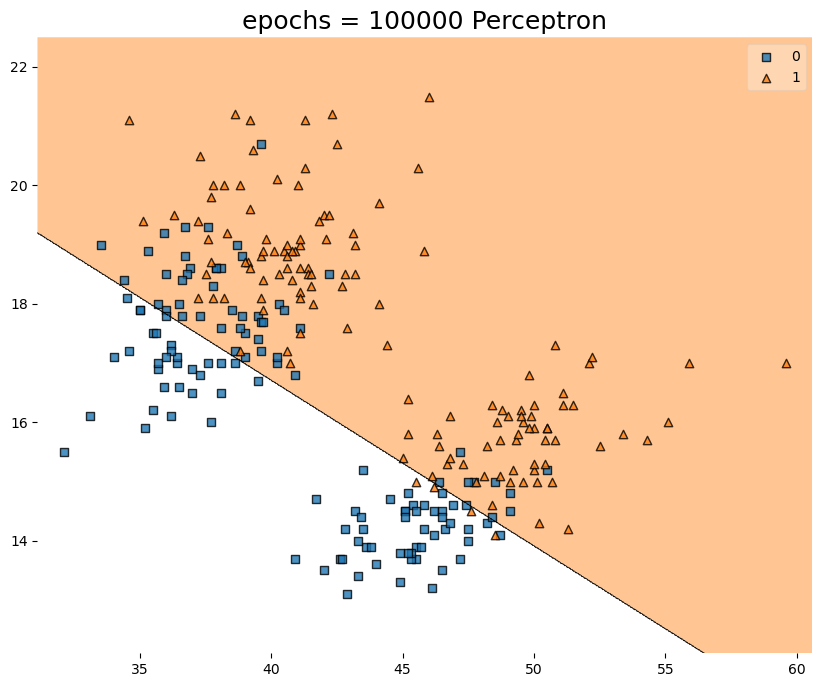

In [38]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X,  y , clf = clf)
plt.title("epochs = 100000 Perceptron", fontsize = 18)

plt.show()

The linear seperator is not so so well maybe because the plot collide with each other and hard to define a region create by staright line. Also, the epochs is very large and reaches 100000. 

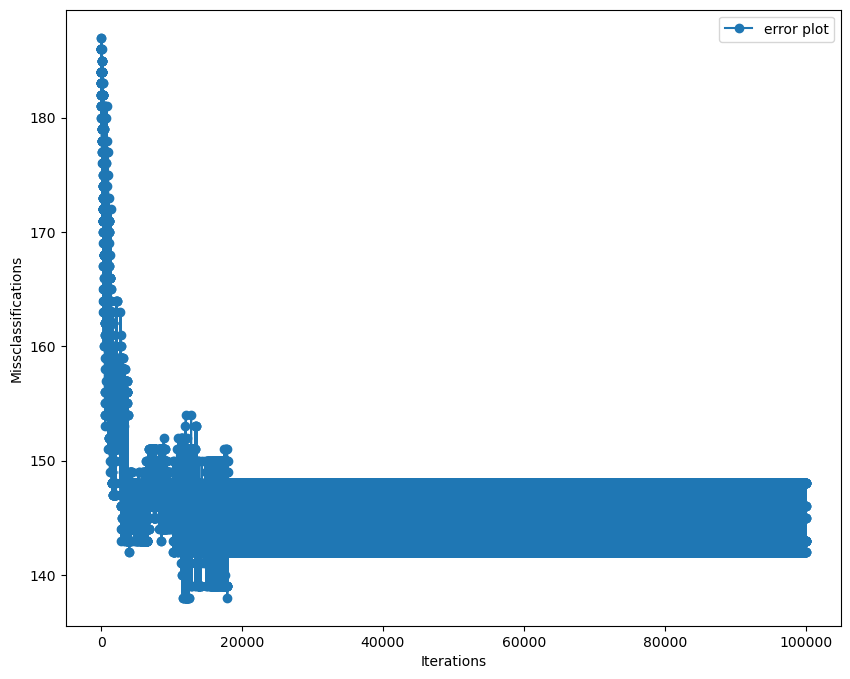

In [39]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(clf.errors_)+1), clf.errors_, 
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()

The interations are changing quickly before 20000 ite, and become steady in the following ites. 